In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [10]:
filename = "./data/covid19_vaccine_2021-04-08.csv"
df = pd.read_csv(filename)
# print(df.loc[(df["metric"] == "Cumulative Daily") & (df["type"] == "All COVID Vaccines")])
new = df.loc[(df["metric"] == "Cumulative Daily") & (df["type"] == "All COVID Vaccines")][["date", "value"]].copy()
new.date = pd.to_datetime(new['date'], format="%Y-%m-%d")
new.set_index(['date'], inplace=True)
print(new.head())

              value
date               
2020-12-14    192.0
2020-12-15    425.0
2020-12-16   4234.0
2020-12-17  16470.0
2020-12-18  28704.0


<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

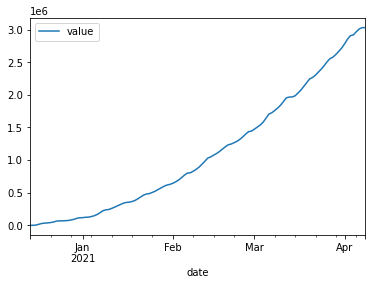

In [11]:
plt.close("all")
plt.figure()
new.plot()

In [12]:
filename = "./data/covid19_cases_demographics_tests_2021-04-15.csv"
df = pd.read_csv(filename)
# df.date = pd.to_datetime(df['date'], format="%Y-%m-%d")
# df.set_index(['date'], inplace=True)
print(df.columns)
df.tail()

Index(['section', 'category', 'description', 'date', 'metric', 'value'], dtype='object')


,section,category,description,date,metric,value
14106,Tests,Teller County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",89174.0
14107,Tests,Unknown County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",NaN
14108,Tests,Washington County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",130198.0
14109,Tests,Weld County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",111539.0
14110,Tests,Yuma County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",96124.0


In [13]:
cases_by_date = df.loc[(df["description"] == "Cases of COVID-19 in Colorado by Date of Illness Onset") & (df["metric"] == "Counts")][["date", "value"]]
cases_by_date["date"] = pd.to_datetime(cases_by_date['date'], format="%Y-%m-%d")
# cases_by_date = cases_by_date.loc[cases_by_date["date"] < np.datetime64("2020-12-14")]
cases_by_date.set_index(['date'], inplace=True)
cases_by_date["cumulative sum"] = cases_by_date.apply(np.cumsum)["value"]
cases_by_date.head()

,value,cumulative sum
date,,
2020-01-01,14.0,14.0
2020-01-02,11.0,25.0
2020-01-03,3.0,28.0
2020-01-04,3.0,31.0
2020-01-05,1.0,32.0


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

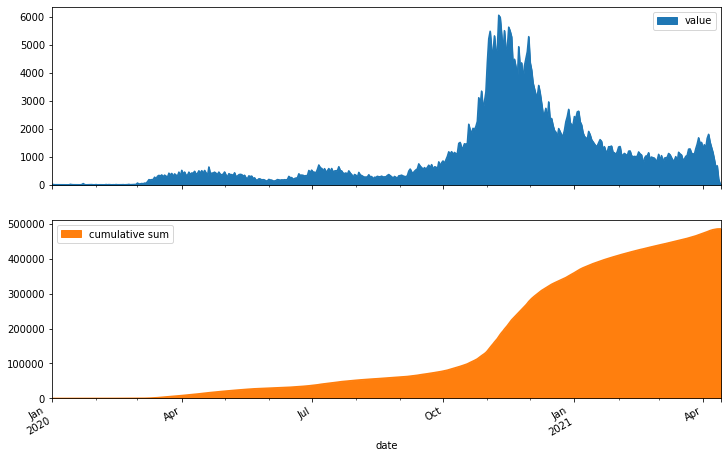

In [14]:
plt.close("all")
plt.figure()
cases_by_date.plot.area(figsize=(12,8), subplots=True)

In [4]:
filename = "./data/covid19_hospital_data_2021-04-15.csv"
df = pd.read_csv(filename)
print(df.columns)
df.tail()

Index(['section', 'category', 'description', 'region', 'date', 'metric',
       'value'],
      dtype='object')


,section,category,description,region,date,metric,value
14510,Hospital Data,Patient Level,Post-Hospitalization Status of Patients (weekly),Colorado,2021-04-11,Another Hospital,0.0211
14511,Hospital Data,Patient Level,Post-Hospitalization Status of Patients (weekly),Colorado,2021-04-11,Home,0.2113
14512,Hospital Data,Patient Level,Post-Hospitalization Status of Patients (weekly),Colorado,2021-04-11,Other,0.7676
14513,Hospital Data,Patient Level,Post-Hospitalization Status of Patients (weekly),Colorado,2021-12-26,Other,0.5000
14514,Hospital Data,Patient Level,Post-Hospitalization Status of Patients (weekly),Colorado,2021-12-26,Skilled Nursing Facility,0.5000


In [ ]:
df["date"] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.set_index(['date'], inplace=True)